<a href="https://colab.research.google.com/github/JulieYego/venv/blob/master/IS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install pytorch-lightning
!pip install Datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import Dataset
import datasets

In [ ]:
import os #provides functions for interacting with the operating system
import pandas as pd
import tensorflow as tf
import nltk
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import requests
from tqdm import tqdm
from nltk.corpus import stopwords

In [ ]:
from transformers import XLMRobertaTokenizer
from transformers import pipeline
model_type = "xlm-roberta-base"
tokenizer = XLMRobertaTokenizer.from_pretrained(model_type)

In [ ]:
#TrainingArguments to specify where to save the checkpoints from training
from transformers import AutoModel, AutoModelForSequenceClassification, TrainingArguments, Trainer, AdamW,get_cosine_schedule_with_warmup

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import evaluate

In [ ]:
import torch
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import torch.nn as nn
from torchmetrics.functional.classification import auroc
import torch.nn.functional as F

In [ ]:
from sklearn.model_selection import train_test_split 

In [2]:
#Path to the dataset
data_path = "/content/drive/MyDrive/Project/IS II Project/Datasets/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv"

In [3]:
trans_part1 = '/content/drive/MyDrive/Colab Notebooks/Trans/Trans_part1.csv'
trans_part1_df = pd.read_csv(trans_part1)
trans_part1_df

NameError: ignored

In [ ]:
trans_p1 = '/content/drive/MyDrive/Colab Notebooks/Trans/TransP1.csv'
trans_p1_df = pd.read_csv(trans_p1)
trans_p1_df

In [ ]:
trans_p2 = '/content/drive/MyDrive/Colab Notebooks/Trans/NewTransP2.csv'
trans_p2_df = pd.read_csv(trans_p2)
trans_p2_df

In [ ]:
df1 = trans_p1_df
df2 = trans_p2_df
# append method
result = df1.append(df2)
display(result)

In [ ]:
result = result.reset_index(drop=True)

In [ ]:
new_result = result[(result['comment_text']=='#ERROR!')].index
result.drop(new_result ,inplace = True)
result

In [ ]:
result = result.reset_index(drop=True)

In [ ]:
result

In [ ]:
Sofia = result.iloc[10260:10270]
Sofia

In [ ]:
result['target'] = (result[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1) >= 1).astype(int)
result[result['target']==1]

In [ ]:
my_test = result[['id', 'Swahili']]
my_test

In [ ]:
my_testset = result[['id', 'Swahili','toxic','severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate','target']]
my_testset

In [ ]:
test_df = my_testset.rename(columns = {"Swahili": "comment_text"})
test_df

In [ ]:
test_df['labels'] = list(zip(test_df.toxic.tolist(), test_df.severe_toxic.tolist(), test_df.obscene.tolist(), test_df.threat.tolist(),  test_df.insult.tolist(), test_df.identity_hate.tolist(),test_df.target.tolist()))
test_df

In [ ]:
my_test_csv = my_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Trans/my_test.csv')

In [ ]:
test_df

In [ ]:
my_test_labels = result[['id', 'toxic','severe_toxic','obscene','threat','insult','identity_hate','target']]
my_test_labels

In [ ]:
my_test_labels_csv = my_test_labels.to_csv('/content/drive/MyDrive/Colab Notebooks/Trans/my_test_labels.csv')

In [ ]:
# default CSV
csv_data = result.to_csv('/content/drive/MyDrive/Colab Notebooks/Trans/trans_test2.csv')

In [ ]:
data_df = pd.read_csv(data_path)

In [ ]:
data_df['target'] = (data_df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1) >= 1).astype(int)
data_df[data_df['target']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,target
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
223448,ff91c3d8a3e34398,NIGEL IS A CRAZY IDIOT!!!,1,0,0,0,1,0,1
223506,ffd49b8defd069d0,""" \n ::Well, now don't I feel stupid.... · """,0,0,0,0,1,0,1
223516,ffdf6854b41d9102,==Fourth Baldrick possibly being cleverer than...,1,0,0,0,0,0,1
223533,ffebe90c8d5acaba,""" \n\n == IRAN == \n That’s right, Iran. It wa...",1,0,1,0,0,0,1


In [ ]:
Sofia_Grades = data_df.iloc[94990:95000]
Sofia_Grades

In [ ]:
train_df = data_df.sample(frac=0.8, random_state=42)
val_df = data_df.drop(train_df.index)

print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of validation examples: {val_df.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

No. of training examples: 178839
No. of validation examples: 44710


In [ ]:
train_df['labels'] = list(zip(train_df.toxic.tolist(), train_df.severe_toxic.tolist(), train_df.obscene.tolist(), train_df.threat.tolist(),  train_df.insult.tolist(), train_df.identity_hate.tolist(),train_df.target.tolist()))
train_df

In [ ]:
val_df['labels'] = list(zip(val_df.toxic.tolist(), val_df.severe_toxic.tolist(), val_df.obscene.tolist(), val_df.threat.tolist(),  val_df.insult.tolist(), val_df.identity_hate.tolist(),val_df.target.tolist()))
val_df

In [ ]:
data_df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,target
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0,1
223548,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",0,0,0,0,0,0,0


In [ ]:
train_df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,target,labels
45216,78e77b50561f8359,"""\nNow that is a heavily biased remark if I ev...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
59580,9f8b8ee425f9421e,REDIRECT Talk:Remembrance day of the Latvian l...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
99542,148549977e0f2113,""":If you're familiar with all these points, th...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
199598,9f924eff364c041c,""" \n\n ::: Excuse me? """"Paranoid conspiracy t...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
189171,76002ef6f5f6280b,""" \n\n == reference to Center for Science in t...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"


In [ ]:
val_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,target,labels
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
10,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
15,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1,"(1, 0, 0, 0, 0, 0, 1)"
18,0009801bd85e5806,The Mitsurugi point made no sense - why not ar...,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"


In [ ]:
my_test.head()

,id,Swahili
0,0000997932d777bf,Maelezo\nJe! Kwa nini mabadiliko yaliyofanywa ...
1,000103f0d9cfb60f,D'aww! Analingana na rangi hii ya nyuma ambayo...
2,000113f07ec002fd,"Haya mtu, sijaribu kuhariri vita. Ni kwamba mt..."
3,0001b41b1c6bb37e,"""\nZaidi\nSiwezi kutoa maoni yoyote ya kweli j..."
4,0001d958c54c6e35,"Wewe, bwana, ni shujaa wangu. Nafasi yoyote un..."


In [ ]:
data_df['comment_text'][46653]

"I actually did intentionally remove the sub-brigades of the Zintanis because there are too many different militias involved in the conflict and if we keep adding all of them the list will be a mess. As for the brackets you added for the Libyan National Army on each side, then yes, you were right. I didn't notice that and you did well by adding them, apologies. You also did an excellent job in the background and the following sections, but I would really appreciate it if you cited some of the info you added. Thanks,"

In [ ]:
test_df['comment_text'][46653]

"'"

In [ ]:
#Check the labels
train_df[train_df.columns[2:]].iloc[10000]

toxic                                0
severe_toxic                         0
obscene                              0
threat                               0
insult                               0
identity_hate                        0
target                               0
labels           (0, 0, 0, 0, 0, 0, 0)
Name: 179188, dtype: object

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178839 entries, 170259 to 189171
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             178839 non-null  object
 1   comment_text   178839 non-null  object
 2   toxic          178839 non-null  int64 
 3   severe_toxic   178839 non-null  int64 
 4   obscene        178839 non-null  int64 
 5   threat         178839 non-null  int64 
 6   insult         178839 non-null  int64 
 7   identity_hate  178839 non-null  int64 
 8   target         178839 non-null  int64 
 9   labels         178839 non-null  object
dtypes: int64(7), object(3)
memory usage: 15.0+ MB


In [ ]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,target
count,178839.000000,178839.000000,178839.000000,178839.000000,178839.000000,178839.000000,178839.000000
mean,0.095516,0.008633,0.054088,0.003008,0.050442,0.009204,0.100398
std,0.293927,0.092515,0.226191,0.054765,0.218856,0.095494,0.300530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Check for duplicates
train_df.duplicated().sum()

0

In [ ]:
train_df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
target           0
labels           0
dtype: int64

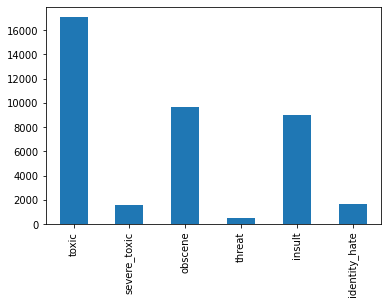

In [ ]:
#Bar chart to visualize distribution of classes
my_attributes = train_df.columns[[2,3,4,5,6,7]]
train_df[my_attributes].sum().plot.bar()

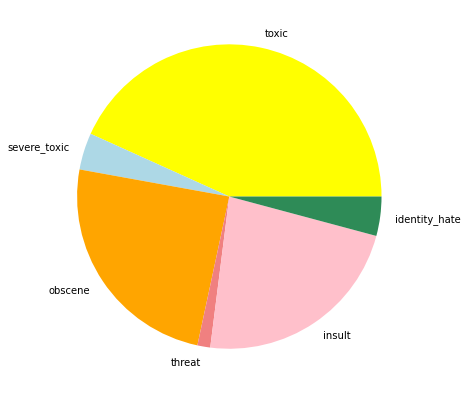

In [ ]:
#Pie chart to visualize distribution of classes
my_labels = train_df.columns[[2,3,4,5,6,7]]
values = train_df.iloc[:,[2,3,4,5,6,7]].sum().values
mycolors = ['yellow','lightblue','orange','lightcoral','pink','seagreen']

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels = my_labels,colors = mycolors)
plt.show()

In [ ]:
#Convert to Hugging Face dataset type
train_set = Dataset.from_pandas(train_df)
train_set

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels', '__index_level_0__'],
    num_rows: 178839
})

In [ ]:
val_set = Dataset.from_pandas(val_df)
val_set

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels', '__index_level_0__'],
    num_rows: 44710
})

In [ ]:
test_set = Dataset.from_pandas(test_df)
test_set

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
    num_rows: 94854
})

In [ ]:
train_set = train_set.remove_columns("__index_level_0__")
train_set

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
    num_rows: 178839
})

In [ ]:
val_set = val_set.remove_columns("__index_level_0__")
val_set

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
    num_rows: 44710
})

In [ ]:
my_datasets = datasets.DatasetDict({
    'train': train_set,
    'valid': val_set,
    'test' : test_set
})

In [ ]:
my_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
        num_rows: 178839
    })
    valid: Dataset({
        features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
        num_rows: 44710
    })
    test: Dataset({
        features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels'],
        num_rows: 94854
    })
})

Tokenization

In [ ]:
comments = train_df['comment_text']

In [ ]:
labels = train_df['labels']
labels

In [ ]:
labels_tensor = torch.FloatTensor(labels) 
labels_tensor  

In [ ]:
attributes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate','target']

In [ ]:
labelz = train_df[attributes]
labelz

In [ ]:
val_set['labels']

In [ ]:
#Function to tokenize the dataset
def tokenize(comments):
    return tokenizer(comments, #comment to encode
                     add_special_tokens = True, #add the </s> token at the beginning and the end
                     max_length = 512, #max length of the tokens
                     padding="max_length", #pad the comment to max_length
                     truncation=True, #truncate the comment to max_length
                     return_attention_mask = True, #create attention masks for [PAD] tokens
                     return_tensors = 'pt' #return pytorch tensors
                     ) 

In [ ]:
def tokens(comments):
    tokenized = tokenizer.encode_plus(comments['comment_text'],
                        add_special_tokens = True, #add the </s> token at the beginning and the end
                        max_length = 512, #max length of the tokens
                        padding="max_length", #pad the comment to max_length
                        truncation=True, #truncate the comment to max_length
                        return_attention_mask = True, #create attention masks for [PAD] tokens
                        return_tensors = 'pt' #return pytorch tensors
                        ) 
    return {'input_ids': tokenized.input_ids.flatten(), 'attention_mask': tokenized.attention_mask.flatten()}
 

In [ ]:
def tokens_test(comments):
    tokenized = tokenizer.encode_plus(comments['Swahili'],
                        add_special_tokens = True, #add the </s> token at the beginning and the end
                        max_length = 512, #max length of the tokens
                        padding="max_length", #pad the comment to max_length
                        truncation=True, #truncate the comment to max_length
                        return_attention_mask = True, #create attention masks for [PAD] tokens
                        return_tensors = 'pt' #return pytorch tensors
                        ) 
    return {'input_ids': tokenized.input_ids.flatten(), 'attention_mask': tokenized.attention_mask.flatten()}

In [ ]:
my_tokenized_datasets = my_datasets.map(tokens)

  0%|          | 0/178839 [00:00<?, ?ex/s]

  0%|          | 0/44710 [00:00<?, ?ex/s]

  0%|          | 0/94854 [00:00<?, ?ex/s]

In [ ]:
my_tokenized_datasets.column_names

In [ ]:
my_tokenized_datasets.remove_columns(["comment_text"])

DatasetDict({
    train: Dataset({
        features: ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 178839
    })
    valid: Dataset({
        features: ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 44710
    })
    test: Dataset({
        features: ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 94854
    })
})

In [ ]:
my_tokenized_datasets_train = my_tokenized_datasets.remove_columns(['id','comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'target'])

In [ ]:
my_tokenized_datasets_train

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 178839
    })
    valid: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 44710
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 94854
    })
})

In [ ]:
my_tokenized_datasets_train.set_format("torch")

In [ ]:
my_tokenized_datasets_train

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 178839
    })
    valid: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 44710
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 94854
    })
})

In [ ]:
small_train_dataset = my_tokenized_datasets_train["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = my_tokenized_datasets_train["test"].shuffle(seed=42).select(range(1000))

In [ ]:
small_train_dataset[0]

In [ ]:
small_eval_dataset

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 1000
})

In [ ]:
#custom dataset class
class my_dataset(Dataset): #inherit from the Dataset class 
  def __init__(self,my_data,tokenizer,attributes): #load data
    self.my_data = my_data
    self.tokenizer = tokenizer 
    self.attributes = attributes
    
  def __len__(self):#returns length of dataset
    return len(self.my_data)

  def __getitem__(self,index):
    item = self.my_data.iloc[index]
    comment = str(item.comment_text)
    attributes = torch.FloatTensor(item[self.attributes])
    tokens = self.tokenizer.encode_plus(comment,
                                        add_special_tokens = True, #add the </s> token at the beginning and the end
                                        max_length = 512, #max length of the tokens
                                        padding = 'max_length',#pad the comment to max_length
                                        truncation = True, #truncate the comment to max_length                                    
                                        return_attention_mask = True, #create attention masks for [PAD] tokens
                                        return_tensors = 'pt', #return pytorch tensors
                                        )
    return {'input_ids': tokens.input_ids.flatten(), 
            'attention_mask': tokens.attention_mask.flatten(), 
            'labels': attributes}

In [ ]:
#create an object of class my_dataset
train_ds = my_dataset(train_df, tokenizer, attributes = attributes)
val_ds = my_dataset(val_df,tokenizer,attributes = attributes)
test_ds = my_dataset(test_df,tokenizer,attributes = attributes)

In [ ]:
train_ds.__getitem__(0)['labels'].shape, train_ds.__getitem__(0)['input_ids'].shape, train_ds.__getitem__(0)['attention_mask'].shape

(torch.Size([7]), torch.Size([512]), torch.Size([512]))

In [ ]:
len(train_ds)

178839

In [ ]:
len(val_ds)

44710

In [ ]:
len(test_ds)

94854

In [ ]:
#sample of the dataset with the input id, attention mask and the label
train_ds.__getitem__(0)

In [ ]:
val_ds.__getitem__(0)

In [ ]:
test_ds.__getitem__(0)

In [ ]:
#check the number of samples
total_samples = len(train_ds)
total_samples

178839

In [ ]:
#create a dataloader for the dataset
train_data_loader = DataLoader(train_ds,batch_size=8, num_workers=2, shuffle=True,drop_last=True)
val_data_loader = DataLoader(val_ds,batch_size=8, num_workers=2, shuffle=True,drop_last=True)
test_data_loader = DataLoader(test_ds,batch_size=8, num_workers=2, shuffle=True,drop_last=True)

In [ ]:
#create a dataloader for the dataset
train_dl = DataLoader(my_tokenized_datasets_train["train"],batch_size=8, num_workers=2, shuffle=True,drop_last=True)
val_dl = DataLoader(my_tokenized_datasets_train["valid"],batch_size=8, num_workers=2,drop_last=True)
test_dl = DataLoader(my_tokenized_datasets_train["test"],batch_size=8, num_workers=2, shuffle=True,drop_last=True)

In [ ]:
#create a dataloader for the dataset
small_train_data_loader = DataLoader(small_train_dataset,batch_size=8,shuffle=True)
small_val_data_loader = DataLoader(small_eval_dataset,batch_size=8)
small_test_data_loader = DataLoader(test_ds,batch_size=8, num_workers=2, shuffle=True,drop_last=True)

In [ ]:
#define hyperparameters
#num_epochs = 10
#n_iterations = math.ceil(total_samples/64)
#print(total_samples,n_iterations)

In [ ]:
len(train_data_loader)

22354

In [ ]:
len(train_dl)

22354

In [ ]:
len(val_data_loader)

5588

In [ ]:
len(test_data_loader)

11856

In [ ]:
for batch in train_data_loader:
  break
print({k:v.shape for k,v in batch.items()})

{'input_ids': torch.Size([8, 512]), 'attention_mask': torch.Size([8, 512]), 'labels': torch.Size([8, 7])}


Model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=7)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [ ]:
torch.cuda.empty_cache()

In [ ]:
outputs = model(**batch)

NameError: ignored

In [ ]:
print(outputs.loss,outputs.logits.shape)

In [ ]:
#optimizer
from torch.optim import AdamW
optimizer = AdamW(model.parameters(),lr = 5e-5) #learning rate

In [ ]:
loss = outputs.loss
loss.backward()
optimizer.step()

In [ ]:
loss

In [ ]:
num_epochs = 10
num_training_steps = num_epochs * len(small_train_data_loader)
num_training_steps

In [ ]:
#Create default learning rate scheduler learning rate scheduler to progressively decay our learning rate to 0
from transformers import get_scheduler

lr_scheduler = get_scheduler(
    name="linear", 
    optimizer = optimizer, 
    num_warmup_steps = 0, 
    num_training_steps = num_training_steps
)

In [ ]:
#Connect to GPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

In [ ]:
#where to save checkpoints from training
training_args = TrainingArguments(output_dir="test_trainer") 

In [ ]:
#Progress bar to keep track of training
progress_bar = tqdm(range(num_training_steps))

In [ ]:
model.train()
for epoch in range(num_epochs):
  for batch in small_train_data_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)  
    loss = outputs.loss
    loss.backward()

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar.update(1)

In [ ]:
metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis = -1)
    return metric.compute(predictions = predictions, references = labels)

In [ ]:
def build_model(transformer, max_len = 512):
    input_word_ids = Input(shape = (max_len,), dtype=tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]    # 0 refers to output for the [CLS] token OR [all sentences,token(0 for CLS),hidden units output]
    out = Dense(1, activation = 'sigmoid')(cls_token)
    
    model = Model(inputs = input_word_ids, outputs = out)
    model.compile(Adam(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model